In [113]:
import warnings
warnings.filterwarnings("ignore")

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [115]:
# Read the data from the CSV file
data = pd.read_csv('Wholesale customers data.csv')
column_names = data.columns.tolist()
print(column_names)

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [116]:
# Perform data normalization
scaler = StandardScaler()
X = data[data.columns[::]]
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**To calculate the BIC or AIC, you can use the GaussianMixture class in scikit-learn, which provides the bic and aic attributes after fitting the model. The lower the BIC or AIC, the better the model fit. You can try different numbers of components and select the one with the lowest BIC or AIC.**

In [117]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Create a range of candidate numbers of components
n_components_range = range(2, 50, 4)  # Define the range of components to consider

# Initialize variables to store the best silhouette score and corresponding number of components
best_score = -1
best_n_components = None

# Iterate over the range of components
for n_components in n_components_range:
    # Fit a GMM model with the current number of components
    model = GaussianMixture(n_components=n_components, random_state=0).fit(X)

    # Get the cluster labels for each data point
    labels = model.predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, labels)

    # Check if the current silhouette score is better than the previous best score
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_components = n_components

# Print the best number of components based on the highest silhouette score
print("Best Number of Components:", best_n_components)
print("Best Silhouette Score:", best_score)


Best Number of Components: 2
Best Silhouette Score: 0.41899408456463


In [119]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


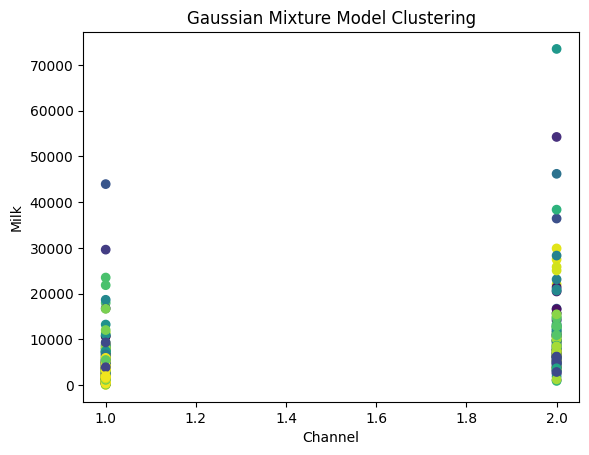

In [125]:
feature1 = 'Channel'  # Name of the first feature column
feature2 = 'Milk'  # Name of the second feature column

# Extract the values for plotting
x1 = X[feature1]
x2 = X[feature2]

# Plot the data points with their cluster labels
plt.scatter(x1, x2, c=labels)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Gaussian Mixture Model Clustering")
plt.show()


In [110]:
import plotly.express as px

# Define the feature columns for the plot
feature1 = 'Channel'
feature2 = 'Milk'
feature3 = 'Fresh'  # Add a third feature column for the 3D plot

# Create a new DataFrame with the selected features
df_plot = data[[feature1, feature2, feature3]]

# Add the cluster labels to the DataFrame
df_plot['Cluster'] = labels

# Create the 3D scatter plot
fig = px.scatter_3d(df_plot, x=feature1, y=feature2, z=feature3, color='Cluster')

# Customize the plot layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title=feature1),
        yaxis=dict(title=feature2),
        zaxis=dict(title=feature3),
    ),
    title="Gaussian Mixture Model Clustering (3D)",
)

# Show the plot
fig.show()


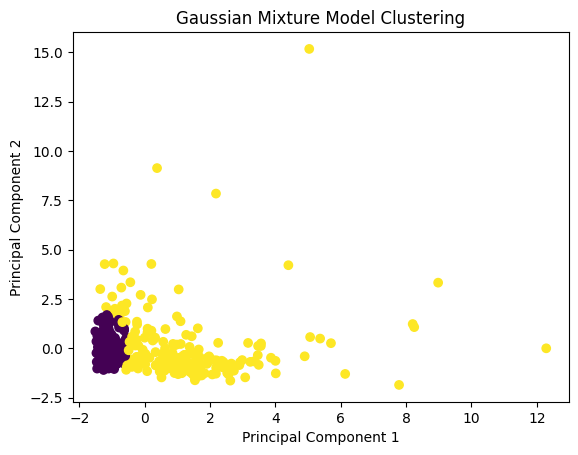

In [111]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocess the data (scaling and dimensionality reduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adjust the parameters of GMM
n_components = 2  # Number of components/clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_pca)

# Get the cluster labels for each data point
labels = gmm.predict(X_pca)

# Plot the data points with their cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Gaussian Mixture Model Clustering")
plt.show()


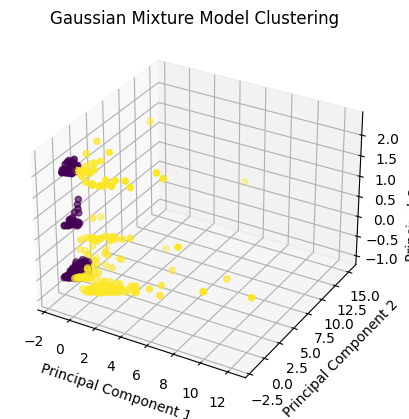

In [126]:
from mpl_toolkits.mplot3d import Axes3D

# Preprocess the data (scaling and dimensionality reduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Adjust the parameters of GMM
n_components = 2  # Number of components/clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_pca)

# Get the cluster labels for each data point
labels = gmm.predict(X_pca)

# Plot the data points with their cluster labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("Gaussian Mixture Model Clustering")
plt.show()
